In [4]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
train_targets[0]

15.2

In [6]:
train_data.shape

(404, 13)

In [7]:
test_data.shape

(102, 13)

数据标准化

In [8]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [9]:
train_data.shape[1]

13

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    #这里input_data为什么不为train_data.shape[0]
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    
    return model

In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100

all_scores = []

for i in range(k):
    print('processing fold #', i + 1)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                       axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                           train_targets[(i + 1) * num_val_samples:]],
                                          axis = 0)
    
    model = build_model()
    model.fit(partial_train_data,
             partial_train_targets,
             epochs = num_epochs,
             batch_size = 1,
             verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    
    all_scores.append(val_mae)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [12]:
all_scores

[2.0216753565438905, 2.27643616600792, 2.9528456064734128, 2.40347291986541]

In [14]:
np.mean(all_scores)

2.4136075122226583

In [23]:
num_epochs = 500

all_mae_histories = []

for i in range(k):
    print('processing fold #', i + 1)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                       axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                           train_targets[(i + 1) * num_val_samples:]],
                                          axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs,
                        batch_size = 1,
                        verbose = 0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [24]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

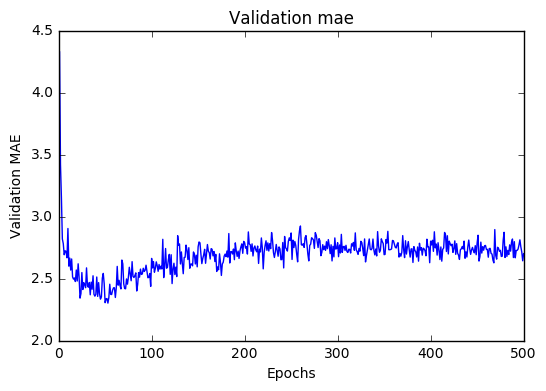

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

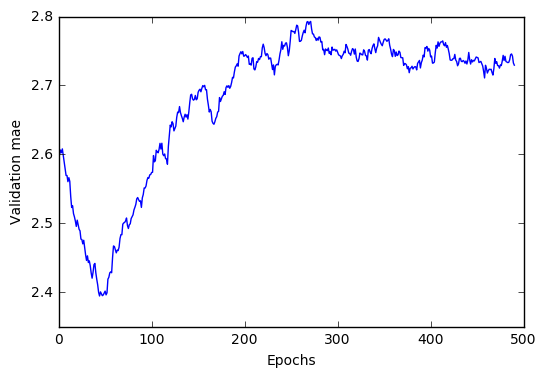

In [41]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smoothed_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation mae')
plt.show()

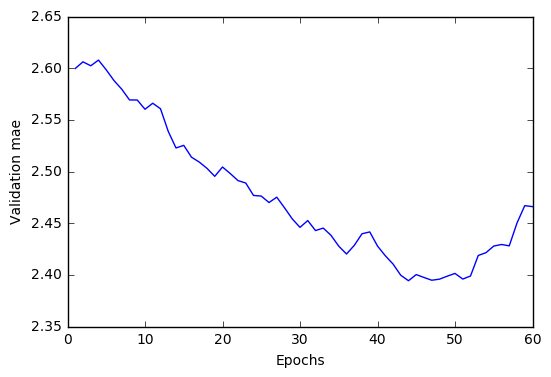

In [43]:
plt.clf()
smoothed_mae_history = smooth_curve(average_mae_history[10:70])
plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation mae')
plt.show()

In [47]:
model = build_model()
model.fit(train_data,
         train_targets,
         epochs = 50,
         batch_size = 1,
         verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
# print(test_mse_score)
print(test_mae_score)

102/102 [==============================] - 0s 2ms/step
2.3074411971896303
